In [1]:
import sys
sys.path.append("../source")

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from runner import runner
from multi_armed_bandit import (
    DeterministicBandit,
    GaussianBandit,
    BinomialBandit,
)
from agent import (
    Agent,
    GradientAgent,
    BetaAgent,
)
from strategy import (
    EpsilonGreedy,
    UpperConfidenceBound,
    Softmax,
)

/Users/yang-seungwon/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Plots    
def plot_result(agents, scores, optimal, labels):
    sns.set_style('white')
    sns.set_context('talk')
    plt.subplot(1, 1, 1)
    plt.plot(scores)
    plt.ylabel('Average Reward')
    plt.ylim([0, np.max(scores)+1])
    plt.legend(labels, loc=4)
    sns.despine()
    plt.show()

In [3]:
# Configuration
num_arm = 2    # A/B groups
num_sample = 1000
num_iter = 1000
num_experiment = 500
probs = (0.84, 0.85)

In [4]:
# Environment
bandit = BinomialBandit(
    num_arm=num_arm, 
    num_trial=1, 
    num_sample=num_sample, 
    probs=probs
)
bandit.setup()

# Agent
agents = [
    BetaAgent(policy=EpsilonGreedy(epsilon=0), num_arm=num_arm, num_trial=1)
]

In [5]:
# Test dataset
dataset = shuffled_dataset = bandit._samples

num_groupA_selected = np.sum(dataset[:, 0])
num_groupB_selected = np.sum(dataset[:, 1])
rate_groupA_selected = num_groupA_selected / num_sample
rate_groupB_selected = num_groupB_selected / num_sample
original_difference = rate_groupB_selected - rate_groupA_selected

print(rate_groupA_selected, rate_groupB_selected)
print(original_difference)

0.827 0.829
0.0020000000000000018


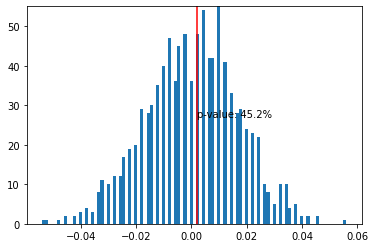

In [6]:
shuffled_dataset = shuffled_dataset.ravel()
shuffled_differences = []
for step in range(num_iter):
    np.random.shuffle(shuffled_dataset)
    shuffled_groupA = shuffled_dataset[:num_sample]
    shuffled_groupB = shuffled_dataset[num_sample:]

    rate_groupA_shuffled = np.sum(shuffled_groupA) / num_sample
    rate_groupB_shuffled = np.sum(shuffled_groupB) / num_sample

    shuffled_differences.append(rate_groupB_shuffled - rate_groupA_shuffled)

min_difference = np.min(shuffled_differences)
max_difference = np.max(shuffled_differences)

hist, bins = np.histogram(
    shuffled_differences,
    bins=np.linspace(min_difference, max_difference, 100)
)

p_ratio = np.sum(shuffled_differences > original_difference) / num_sample

plt.hist(shuffled_differences, bins)
plt.ylim([0, np.max(hist)])
plt.text(original_difference, np.max(hist)//2, "p-value: {0:0>3}%".format(p_ratio*100))
plt.axvline(x=original_difference, color="red")
plt.show()

In [7]:
# Run simulation
results = runner(bandit=bandit, agents=agents, num_iter=num_iter, num_experiment=num_experiment)
print(results["value_estimates"])

iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  0
Experiment:  1
Experiment:  2


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  3
Experiment:  4
Experiment:  5


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  6
Experiment:  7
Experiment:  8


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  9
Experiment:  10
Experiment:  11


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  12
Experiment:  13
Experiment:  14


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  15
Experiment:  16
Experiment:  17


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  18
Experiment:  19
Experiment:  20


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  21
Experiment:  22
Experiment:  23


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  24
Experiment:  25
Experiment:  26


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  27
Experiment:  28
Experiment:  29


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  30
Experiment:  31
Experiment:  32


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  33
Experiment:  34
Experiment:  35


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  36
Experiment:  37
Experiment:  38
Experiment:  39


iterations: 100%|██████████| 1000/1000 [00:00<00:00, 14834.18it/s]

Experiment:  40
Experiment:  41
Experiment:  42



iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  43
Experiment:  44
Experiment:  45
Experiment:  46


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  47
Experiment:  48
Experiment:  49
Experiment:  50


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  51
Experiment:  52
Experiment:  53


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  54
Experiment:  55
Experiment:  56


iterations: 100%|██████████| 1000/1000 [00:00<00:00, 16743.93it/s]

Experiment:  57
Experiment:  58
Experiment:  59



iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  60
Experiment:  61
Experiment:  62


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  63
Experiment:  64
Experiment:  65


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  66
Experiment:  67
Experiment:  68


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  69
Experiment:  70


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  71
Experiment:  72
Experiment:  73


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  74
Experiment:  75
Experiment:  76


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  77
Experiment:  78
Experiment:  79


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  80
Experiment:  81
Experiment:  82


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  83
Experiment:  84
Experiment:  85


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  86
Experiment:  87
Experiment:  88


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  89
Experiment:  90
Experiment:  91


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  92
Experiment:  93
Experiment:  94


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  95
Experiment:  96
Experiment:  97


iterations: 100%|██████████| 1000/1000 [00:00<00:00, 16533.25it/s]


Experiment:  98
Experiment:  99
Experiment:  100
Experiment: 

iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

 101
Experiment:  102
Experiment:  103


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  104
Experiment:  105
Experiment:  106


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  107
Experiment:  108
Experiment:  109


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  110
Experiment:  111
Experiment:  112


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  113
Experiment:  114
Experiment:  115
Experiment:  116


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  117
Experiment:  118
Experiment:  119


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  120
Experiment:  121
Experiment:  122


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  123
Experiment:  124
Experiment:  125


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  126
Experiment:  127
Experiment:  128
Experiment:  129


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  130
Experiment:  131
Experiment:  132
Experiment:  133


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  134
Experiment:  135
Experiment:  136


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  137
Experiment:  138
Experiment:  139
Experiment:  140


iterations: 100%|██████████| 1000/1000 [00:00<00:00, 16875.09it/s]

Experiment:  141
Experiment:  142
Experiment:  143



iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  144
Experiment:  145
Experiment:  146
Experiment:  147


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  148
Experiment:  149
Experiment:  150


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  151
Experiment:  152
Experiment:  153
Experiment:  154


iterations: 100%|██████████| 1000/1000 [00:00<00:00, 15422.33it/s]

Experiment:  155
Experiment:  156
Experiment:  157



iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  158
Experiment:  159
Experiment:  160


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  161
Experiment:  162
Experiment:  163


iterations: 100%|██████████| 1000/1000 [00:00<00:00, 16357.48it/s]


Experiment:  164
Experiment:  165
Experiment:  166
Experiment:  167


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  168
Experiment:  169
Experiment:  170


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  171
Experiment:  172
Experiment:  173


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  174
Experiment:  175
Experiment:  176


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  177
Experiment:  178
Experiment:  179


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  180
Experiment:  181
Experiment:  182


iterations: 100%|██████████| 1000/1000 [00:00<00:00, 15871.46it/s]

Experiment:  183
Experiment:  184
Experiment:  185



iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  186
Experiment:  187
Experiment:  188
Experiment:  189


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  190
Experiment:  191
Experiment:  192


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  193
Experiment:  194
Experiment:  195
Experiment:  196


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  197
Experiment:  198
Experiment:  199
Experiment:  200


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  201
Experiment:  202
Experiment:  203


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  204
Experiment:  205
Experiment:  206


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  207
Experiment:  208
Experiment:  209
Experiment:  210


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  211
Experiment:  212
Experiment:  213


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  214
Experiment:  215
Experiment:  216


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  217
Experiment:  218
Experiment:  219


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  220
Experiment:  221
Experiment:  222


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  223
Experiment:  224


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  225
Experiment:  226


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  227
Experiment:  228


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  229
Experiment:  230


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  231
Experiment:  232


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  233
Experiment:  234


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  235
Experiment:  236


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  237
Experiment:  238


iterations:  69%|██████▊   | 687/1000 [00:00<00:00, 6862.51it/s]

Experiment:  239
Experiment:  240


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  241
Experiment:  242


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  243
Experiment:  244
Experiment:  245
Experiment:  246


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  247
Experiment:  248
Experiment:  249


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  250
Experiment:  251
Experiment:  252
Experiment:  253


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  254
Experiment:  255


iterations:  87%|████████▋ | 871/1000 [00:00<00:00, 8705.07it/s]

Experiment:  256
Experiment:  257


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  258
Experiment:  259


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  260
Experiment:  261
Experiment:  262
Experiment:  263


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  264
Experiment:  265
Experiment:  266
Experiment:  267


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  268
Experiment:  269
Experiment:  270
Experiment:  271


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  272
Experiment:  273
Experiment:  274
Experiment:  275


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  276
Experiment:  277
Experiment:  278


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  279
Experiment:  280
Experiment:  281
Experiment:  282


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  283
Experiment:  284
Experiment:  285
Experiment:  286


iterations:  19%|█▉        | 188/1000 [00:00<00:00, 1879.38it/s]

Experiment:  287


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  288
Experiment:  289


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  290
Experiment:  291


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  292
Experiment:  293
Experiment:  294


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  295
Experiment:  296
Experiment:  297


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  298
Experiment:  299
Experiment:  300
Experiment:  301


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  302
Experiment:  303
Experiment:  304
Experiment:  305


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  306
Experiment:  307
Experiment:  308


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  309
Experiment:  310
Experiment:  311


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  312
Experiment:  313
Experiment:  314


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  315
Experiment:  316
Experiment:  317


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  318
Experiment:  319
Experiment:  320
Experiment:  321


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  322
Experiment:  323
Experiment:  324
Experiment:  325


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  326
Experiment:  327
Experiment:  328
Experiment:  329


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  330
Experiment:  331
Experiment:  332


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  333
Experiment:  334
Experiment:  335


iterations: 100%|██████████| 1000/1000 [00:00<00:00, 13802.82it/s]

Experiment:  336
Experiment:  337
Experiment:  338



iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  339
Experiment:  340
Experiment:  341
Experiment:  342


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  343
Experiment:  344
Experiment:  345
Experiment:  346


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  347
Experiment:  348
Experiment:  349
Experiment:  350


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  351
Experiment:  352
Experiment:  353
Experiment:  354


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  355
Experiment:  356
Experiment:  357


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  358
Experiment:  359
Experiment:  360
Experiment:  361


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  362
Experiment:  363
Experiment:  364


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  365
Experiment:  366
Experiment:  367


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  368
Experiment:  369
Experiment:  370
Experiment:  371


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  372
Experiment:  373
Experiment:  374
Experiment:  375


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  376
Experiment:  377
Experiment:  378
Experiment:  379


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  380
Experiment:  381
Experiment:  382
Experiment:  383


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  384
Experiment:  385
Experiment:  386
Experiment:  387


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  388
Experiment:  389
Experiment:  390
Experiment:  391


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  392
Experiment:  393
Experiment:  394


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  395
Experiment:  396
Experiment:  397


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  398
Experiment:  399
Experiment:  400


iterations:  27%|██▋       | 274/1000 [00:00<00:00, 2739.32it/s]

Experiment:  401
Experiment:  402


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  403
Experiment:  404


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  405
Experiment:  406


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  407
Experiment:  408
Experiment:  409
Experiment:  410


iterations: 100%|██████████| 1000/1000 [00:00<00:00, 16791.46it/s]


Experiment:  411
Experiment:  412
Experiment:  413
Experiment: 

iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

 414
Experiment:  415
Experiment:  416


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  417
Experiment:  418
Experiment:  419


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  420
Experiment:  421
Experiment:  422


iterations:  92%|█████████▏| 924/1000 [00:00<00:00, 9239.81it/s]

Experiment:  423
Experiment:  424


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  425
Experiment:  426
Experiment:  427


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  428
Experiment:  429
Experiment:  430


iterations:  79%|███████▉  | 790/1000 [00:00<00:00, 7811.56it/s]

Experiment:  431
Experiment:  432


iterations:  80%|███████▉  | 798/1000 [00:00<00:00, 7976.81it/s]

Experiment:  433
Experiment:  434


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  435
Experiment:  436


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  437
Experiment:  438
Experiment:  439


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  440
Experiment:  441
Experiment:  442


iterations: 100%|██████████| 1000/1000 [00:00<00:00, 5137.87it/s]

Experiment:  443



iterations:  64%|██████▎   | 636/1000 [00:00<00:00, 6267.11it/s]

Experiment:  444


iterations:  55%|█████▍    | 545/1000 [00:00<00:00, 5448.91it/s]

Experiment:  445


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  446
Experiment:  447


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  448
Experiment:  449


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  450
Experiment:  451
Experiment:  452


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  453
Experiment:  454
Experiment:  455


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  456
Experiment:  457


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  458
Experiment:  459
Experiment:  460


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  461
Experiment:  462
Experiment:  463
Experiment:  464


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  465
Experiment:  466
Experiment:  467


iterations:  28%|██▊       | 285/1000 [00:00<00:00, 2504.06it/s]

Experiment:  468


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  469
Experiment:  470
Experiment:  471


iterations:  93%|█████████▎| 926/1000 [00:00<00:00, 8953.80it/s]

Experiment:  472
Experiment:  473


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  474
Experiment:  475


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  476
Experiment:  477
Experiment:  478


iterations:  99%|█████████▉| 991/1000 [00:00<00:00, 9906.04it/s]

Experiment:  479
Experiment:  480


iterations:  29%|██▉       | 289/1000 [00:00<00:00, 2468.04it/s]

Experiment:  481


iterations:  56%|█████▋    | 563/1000 [00:00<00:00, 5619.11it/s]

Experiment:  482


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  483
Experiment:  484
Experiment:  485


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  486
Experiment:  487
Experiment:  488
Experiment:  489


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  490
Experiment:  491
Experiment:  492
Experiment:  493


iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Experiment:  494
Experiment:  495
Experiment:  496


iterations: 100%|██████████| 1000/1000 [00:00<00:00, 16563.42it/s]

Experiment:  497
Experiment:  498
Experiment:  499
[[0.80952376 0.83532072]]
